# Analysing Amazon Orders Expenditure

My aim in this project is to analyse my expenditure on Amazon by using Amazon data. My main focus will be on the following points:

- Figured out the total amount of money I’ve spent on Amazon.
- Find my most and least expensive orders, and my average and median order totals.
- Figured out how much I’ve paid in taxes, and my effective sales tax rate on Amazon.
- Visualized my spending habits day-by-day in a bar graph.
- Customized some elements of the bar graph, like size and colors.

In [1]:
#import pandas
import pandas as pd

## Downloading Amazon Order History Data

To get the data, I can navigate to the page directly: Going to Amazon.com and clicking the Accounts and Lists button in the top right. On the next page, looking for the Ordering and Shopping Preferences section, and click on the link under that heading that says “Download order reports”.

Since, I would not prefer to use my own data, I'll be downloading the anonymised data set called 'amazon-orders.csv' which is very similar to actual data set.


In [2]:
# Create a dataframe using pandas and store Amazon data in it

df = pd.read_csv('amazon-orders.csv')

In [3]:
# Use a pandas function called .head() to look at the first five rows our our data.
# This will give us a taste of what we’re working with, and what kinds of data Amazon’s order history includes.

df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,NaN
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,NaN
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,NaN
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,NaN,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,NaN
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,NaN,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,NaN,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,NaN


In [4]:
# Checking the dimension of the dataframe
df.shape

(59, 23)

Now I know that my dataframe has 59 rows and 23 columns. (I'm using a pretty small data set for this project)

Looking at the table above, the first thing you’ll notice is probably that it’s fake data. The data set I'm using in this project is an edited version of some of my own Amazon purchase history. I’ve changed names, addresses, card numbers, and purchase prices to protect my privacy, but this data is in the exact same format as the real data you’ll download from Amazon, and the code that we use on this anonymised data will work on your real data, too — no matter how much of it you have.

The column names that Amazon’s data comes with by default are pretty descriptive, and it’s clear that there are interesting things to look at in this data set. Our first goal will be to figure out **how much we’ve spent in total, and calculate our average price per order**. That means the data in the *Total Charged* column is definitely going to be important for us.

## Cleaning the Data

In [5]:
# Since NaN represents the absence of information, let’s just fill in all of those NaN values using pandas’s handy df.fillna() function.
# Replace NaN with '0'

df = df.fillna(0)
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,$36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,$16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,$9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,$156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,$14.99,Your Name,0.0


In [6]:
# Converting the value in 'Total Charged' from String to Float and also removing the '$' sign

df['Total Charged'] = df['Total Charged'].str.replace('$','').astype(float)

In [7]:
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,$1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,$0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,$0.00,9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,$8.14,156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,$0.00,14.99,Your Name,0.0


Scroll over to the right in this table above and you can see what we’ve done: the dollar signs are all gone. 

## Calculating the Total Amount of Money Spent on Amazon

In [8]:
# Finding the Total Amount spent on Amazon
df['Total Charged'].sum()

1777.7300000000002

There it is: $1,777.73. That’s how much money I have spent on Amazon, at least within the confines of this limited and edited data set.

## Calculating Other Things: Average Spend on Amazon, Biggest Purchase, Etc.

In [9]:
#Finding the Average Amount per Order

df['Total Charged'].mean()

30.131016949152542

My average spend per order, apparently, is about $30.

Since looking at the mean/average can sometimes hide outliers, it’s nice to check out the median as well. 

In [10]:
#Finding the Median
df['Total Charged'].median()

15.95

That’s interesting! My median spend is quite a bit lower than my average spend. Looks like I made a few expensive orders. Let’s see what the highest-priced order was:

In [11]:
#Highest-Priced Order
df['Total Charged'].max()

210.99

In [12]:
#Lowest-Priced Order
df['Total Charged'].min()

1.04

# How much have I paid in Sales TAX?

We can find out using the "Tax Charged" column but it also need to be cleaned first. Again, we need to converting the value in 'Tax Charged' from String to Float and also removing the '$' sign

In [13]:
df['Tax Charged'] = df['Tax Charged'].str.replace('$','').astype(float)
df.head()


,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,04/01/19,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,1.93,36.93,Your Name,0.0
1,04/01/19,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,0.00,16.99,Your Name,0.0
2,04/01/19,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,0.00,9.99,Your Name,0.0
3,04/04/19,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,8.14,156.12,Your Name,0.0
4,04/05/19,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,0.00,14.99,Your Name,0.0


In [14]:
#Total Tax paid
df['Tax Charged'].sum()

52.60999999999999

Apparently, about $52.61 of the total money I spent on Amazon went towards taxes. The tax rate on different items varies — we can see in the DataFrame preview above that some items did not charge any tax at all. But if we wanted to, we could figure out the overall tax rate by simply dividing our "Total Charged" sum from our "Tax Charged" sum, like so:

In [15]:
#Overall Tax rate calculation
df['Tax Charged'].sum() / df['Total Charged'].sum()

0.02959392033660904

During this time period, I paid an overall effective sales tax rate of about 2.9%.

## Analysing Amazon Spending Over Time.

Before we can work with Python, we need to convert them to datetime data type.

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Order ID,Payment Instrument Type,Website,Purchase Order Number,Ordering Customer Email,Shipment Date,Shipping Address Name,Shipping Address Street 1,Shipping Address Street 2,...,Order Status,Carrier Name & Tracking Number,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged,Buyer Name,Group Name
0,2019-04-01,112-0000000-0000001,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$35.00,$0.00,$1.93,$0.00,1.93,36.93,Your Name,0.0
1,2019-04-01,112-0000000-0000002,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$16.99,$0.00,$0.00,$0.00,0.00,16.99,Your Name,0.0
2,2019-04-01,112-0000000-0000003,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/01/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$9.99,$0.00,$0.00,$0.00,0.00,9.99,Your Name,0.0
3,2019-04-04,112-0000000-0000004,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/05/19,Your Name,1 YOUR STREET,0.0,...,Shipped,UPS(0002),$147.98,$0.00,$8.14,$0.00,8.14,156.12,Your Name,0.0
4,2019-04-05,112-0000000-0000005,Visa - 0001,Amazon.com,0.0,your_email@gmail.com,04/07/19,Your Name,1 YOUR STREET,0.0,...,Shipped,USPS(0001),$14.99,$0.00,$0.00,$0.00,0.00,14.99,Your Name,0.0


From that one row, we can see that the date formatting has changed from **2019/04/01 to 2019-04-01**. That’s a good sign that our change to datetime has worked, and we can proceed to the next step of our analysis.

One thing that might be interesting to look at is how much was spent on each particular day in this data set. This analysis would be easy to look at visually, so I'll create a Bar Graph.

## Creating a Bar Graph

In [17]:
#This will enable matplotlib to display charts in Jupyter Notebook
%matplotlib inline

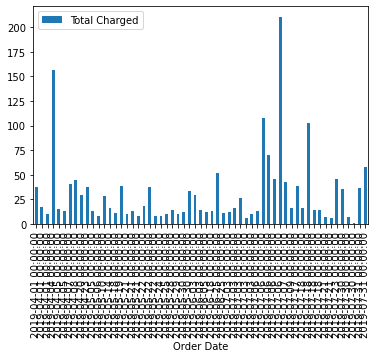

In [18]:
#Making basic Bar Graph
df.plot.bar(x='Order Date', y= 'Total Charged', rot = 90)

That chart is a little small, and it’s hard to see whether we’ve really gotten what we want. Let’s make it bigger so that we can read the data more easily.

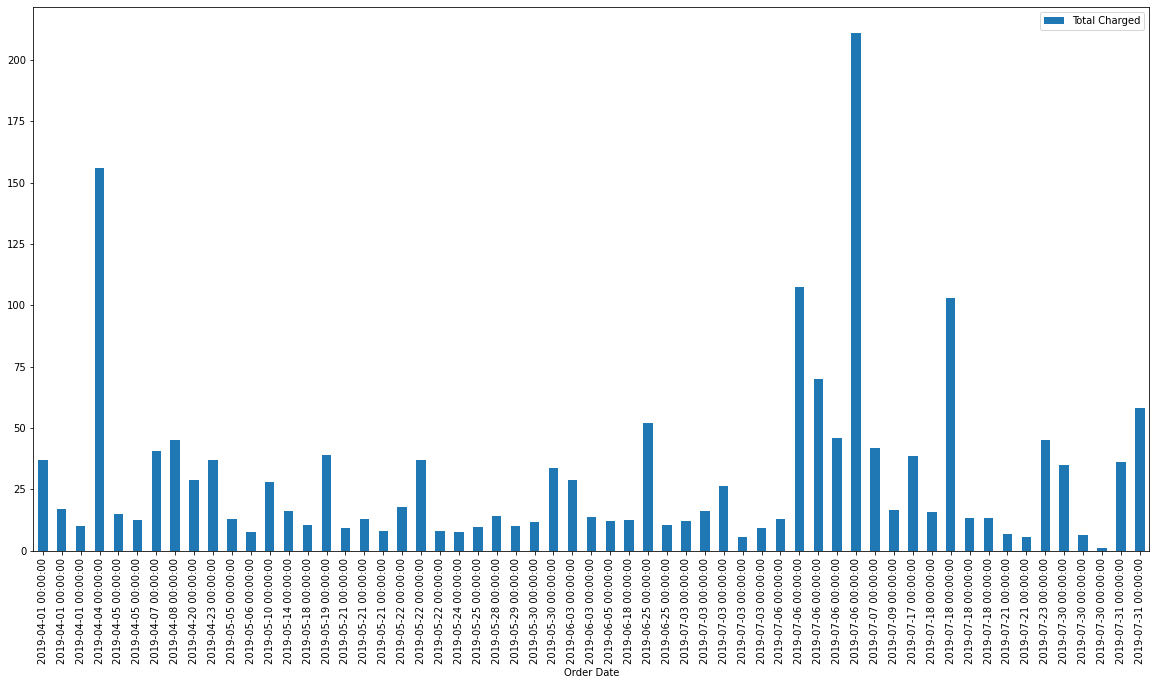

In [22]:
#Make the Bar Graphs bigger using figsize
df.plot.bar(x='Order Date', y= 'Total Charged', rot = 90, figsize=(20,10))

That’s easier to read! But if I take a close look at the chart above, I can spot a problem: when multiple orders were placed on the same day, each order is getting a separate bar in the bar chart. 

For example, at the first three bars on the chart — all three of them are for April 1, representing three separate orders placed that day.

In [20]:
#Group multiple orders from same day into one date
#Group the date by Order Date

daily_orders = df.groupby('Order Date').sum()['Total Charged']
daily_orders.head()

Order Date
2019-04-01     63.91
2019-04-04    156.12
2019-04-05     27.64
2019-04-07     40.63
2019-04-08     44.99
Name: Total Charged, dtype: float64

The result above is Series rather than a dataframe and since the series only has one column and one set of index lables, we don't need to define x and y axes.

Also changing the color of the bar chart to green using the hex code

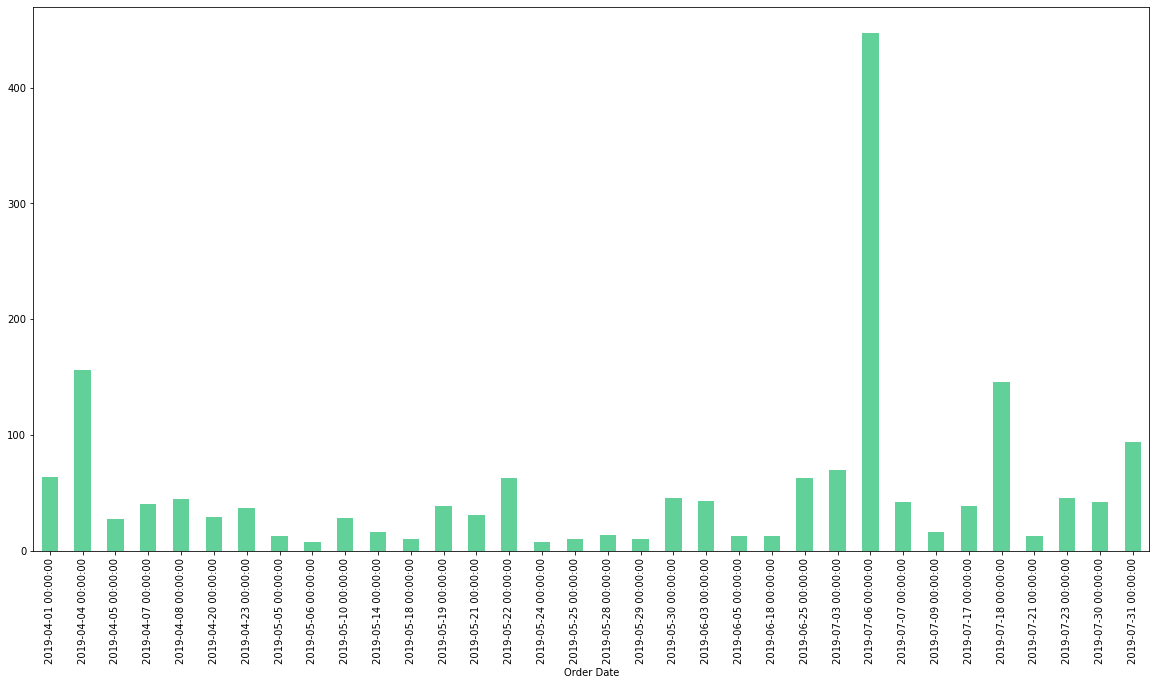

In [21]:
daily_orders.plot.bar(figsize=(20,10), color = '#61D199')

This chart shows us something our previous analysis hasn’t: although the biggest single order was just over 200, there was a single day in July where several orders totaled up to well over 400.

## Conclusion

In this project, I manged to figure out the followings about my Amazon orders expenditure:
- How much I spent on Amazon during this period.
- What my highest, lowest, and average order totals were.
- How much tax I paid, and the effective sales tax rate I paid.
- How my spending fluctuated over time
- On which days I spent the most money